<a href="https://colab.research.google.com/github/e-evarela/DataJour/blob/main/ENOIKIA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
%matplotlib inline
import numpy as np
import glob
from sklearn.feature_extraction.text import CountVectorizer
from datetime import datetime

In [ ]:
filepath = "https://raw.githubusercontent.com/datajour-gr/DataJournalism/main/Bachelor%20Lessons%202023/Lesson%2010/NRC_GREEK_Translated_6_2020.csv"

In [ ]:
emolex_df = pd.read_csv(filepath)
emolex_df.head()

,word,Positive,Negative,Anger,Anticipation,Disgust,Fear,Joy,Sadness,Surprise,Trust
0,αφεση,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,ενορκη βεβαιωση,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,εχοντας,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,εχω,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,οριο,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
emolex_df.tail()

,word,Positive,Negative,Anger,Anticipation,Disgust,Fear,Joy,Sadness,Surprise,Trust
13166,ουρλιασμα,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
13167,κροκος αυγου,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13168,νεοτερος,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13169,ζεφυρος,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13170,ζουμ,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
emolex_df = emolex_df.drop_duplicates(subset=['word'])
emolex_df = emolex_df.dropna()
emolex_df.reset_index(inplace = True, drop=True)

In [ ]:
emolex_df.tail()

,word,Positive,Negative,Anger,Anticipation,Disgust,Fear,Joy,Sadness,Surprise,Trust
13156,ουρλιασμα,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
13157,κροκος αυγου,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13158,νεοτερος,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13159,ζεφυρος,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13160,ζουμ,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


**Εισαγωγή της βιβλιοθήκης spacy για να έχουμε δυνατότητες nlp**

In [ ]:
!python -m spacy download el_core_news_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.6/12.6 MB 38.8 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('el_core_news_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [ ]:
import spacy

In [ ]:
nlp = spacy.load('el_core_news_sm')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
kathimerini_df = pd.read_csv("/content/drive/MyDrive/DataJour/Articles_Kathimerini_enoikia.csv")
kathimerini_df['source'] = 'Καθημερινή'
tovima_df = pd.read_csv("/content/drive/MyDrive/DataJour/Articles_ToVima_Enoikia.csv")
tovima_df['source'] = 'Το Βήμα'
athensvoice_df = pd.read_csv("/content/drive/MyDrive/DataJour/Articles_AthensVoice_enoikia.csv")
athensvoice_df['source'] = 'Athens Voice'
naftemporiki_df = pd.read_csv("/content/drive/MyDrive/DataJour/CORRECTEDArticles_Naftemporiki_Enoikia.csv")
naftemporiki_df['source'] = 'Ναυτεμπορική'
kathimerini_df


/usr/local/lib/python3.11/dist-packages/google/colab/_dataframe_summarizer.py:88: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  cast_date_col = pd.to_datetime(column, errors="coerce")


,article_url,title,date,time,section,author,excerpt,text_body,feat_img_link,feat_img_cation,source
0,https://www.kathimerini.gr/politics/563652409/...,NaN,NaN,NaN,NaN,NaN,NaN,"Μπορεί ένα σπίτι να δηλώνεται κλειστό, ενώ την...",NaN,NaN,Καθημερινή
1,https://www.kathimerini.gr/k/k-magazine/563578...,NaN,NaN,NaN,NaN,NaN,NaN,Υπό κανονικές συνθήκες δεν θα έπρεπε να το θεω...,NaN,NaN,Καθημερινή
2,https://www.kathimerini.gr/visual/infographics...,NaN,NaN,NaN,NaN,NaN,NaN,Σε αναπτυξιακά έργα που χρηματοδοτούνται από τ...,NaN,NaN,Καθημερινή
3,https://www.kathimerini.gr/economy/563537686/a...,"Αυξήθηκαν κατά 65,5% τα ενοίκια γραφείων την τ...",2025-03-30,07:38:11,Οικονομία,Νίκος Ρουσάνογλου,Πώς διαμορφώνονται οι τιμές σε κεντρικές οδικέ...,"Αύξηση 65,5% κατά μέσον όρο καταγράφουν τα ενο...",https://www.kathimerini.gr/wp-content/uploads/...,"Σήμερα, το μηνιαίο κόστος ενοικίασης ενός αυτο...",Καθημερινή
4,https://www.kathimerini.gr/economy/563521807/g...,Γιατί εκτινάχθηκαν τα ενοίκια στις ανεπτυγμένε...,2025-03-19,18:31:20,Οικονομία,Newsroom,"Τα ακριβά στεγαστικά δάνεια, το «πάγωμα» της ο...",Η εκρηκτική άνοδος των ενοικίων διαμορφώνει μι...,https://www.kathimerini.gr/wp-content/uploads/...,H αύξηση των ενοικίων πλήττει περισσότερο τους...,Καθημερινή
5,https://www.kathimerini.gr/economy/563453656/l...,Λονδίνο: Ζουν σε ερημωμένα σχολεία για να αποφ...,2025-02-05,12:04:00,Οικονομία,Newsroom,"Στο Λονδίνο, εταιρεία βρίσκει ενοίκους για άδε...","Σε μια προσπάθεια να αποφύγουν τα ενοίκια, που...",https://www.kathimerini.gr/wp-content/uploads/...,Φωτ. A.P.,Καθημερινή
6,https://www.kathimerini.gr/economy/563447911/l...,"Λιγότερα διαθέσιμα σπίτια, ακριβότερα ενοίκια",2025-02-04,17:19:56,Οικονομία,Νίκος Ρουσάνογλου,Πάνω από 10 ευρώ/τ.μ. η μέση τιμή ενοικίασης γ...,Συνεχίζεται η «αιμορραγία» διαθέσιμων για ενοι...,https://www.kathimerini.gr/wp-content/uploads/...,NaN,Καθημερινή
7,https://www.kathimerini.gr/economy/563439274/d...,"Δεν αύξησε τα ενοίκια επί τρία χρόνια, δηλώνει...",2025-01-28,09:07:00,Οικονομία,Νίκος Ρουσάνογλου,Ποσοστό 12% αναφέρει ότι έχει επιβάλει αυξήσει...,Σταθερά έχουν κρατήσει τα ενοίκια έξι στους δέ...,https://www.kathimerini.gr/wp-content/uploads/...,Φωτ. ΑΠΕ.,Καθημερινή
8,https://www.kathimerini.gr/economy/563392453/o...,Οι όροι για αφορολόγητα ενοίκια,2024-12-27,09:11:00,Οδηγός για τους ιδιοκτήτες,Προκόπης Χατζηνικολάου,Τις εγκυκλίους και τις αποφάσεις που ενεργοποι...,Τις εγκυκλίους και τις αποφάσεις που ενεργοποι...,https://www.kathimerini.gr/wp-content/uploads/...,"Από το 2025 και εφεξής, για κατοικίες φυσικών ...",Καθημερινή
9,https://www.kathimerini.gr/society/563380492/o...,Ακίνητα: Οι ανακαινίσεις τριπλασιάζουν τα ενοίκια,2024-12-18,18:47:49,REAL ESTATE,Νίκος Ρουσάνογλου,"Σύμφωνα με την Protio, το 65% των διαμερισμάτω...",«Πεδίο δόξης λαμπρό» διαμορφώνεται για όσους ι...,https://www.kathimerini.gr/wp-content/uploads/...,Shutterstock,Καθημερινή


In [ ]:
airbnb_df= pd.concat([kathimerini_df, tovima_df, athensvoice_df, naftemporiki_df], ignore_index=True)

In [ ]:
airbnb_df = airbnb_df.dropna(subset="date").reset_index(drop=True)
airbnb_df = airbnb_df.dropna(subset="text_body").reset_index(drop=True)
airbnb_df.shape

(224, 14)

In [ ]:
airbnb_df.tail(20)

,article_url,title,date,time,section,author,excerpt,text_body,feat_img_link,feat_img_cation,source,excert,feat_img_caption,subtitle
204,https://www.naftemporiki.gr/politics/1790289/t...,"Τα ενοίκια του Κασσελάκη, τα «πακέτα Μπάιντεν»...",2024-10-09,06:48:00,Πολιτική,NaN,Η Σύνοδος για την Ουκρανία,«Περνάνε καλά και αυτό βγαίνει προς τα έξω». Ε...,https://www.naftemporiki.gr/wp-content/themes/...,Ακόμα μία ελληνική εταιρεία γοητεύτηκε από τα ...,Ναυτεμπορική,NaN,NaN,NaN
205,https://www.naftemporiki.gr/finance/economy/17...,Πώς θα ανοίξουν κλειστά διαμερίσματα και θα με...,2024-08-24,08:54:16,Οικονομία & Αγορές \Οικονομία,NaN,Η στεγαστική κρίση – δηλαδή η εκτίναξη των ενο...,Στο οικονομικό επιτελείο βάζουν τις τελευταίες...,https://www.naftemporiki.gr/wp-content/themes/...,6 παρεμβάσεις αναμένονται για την ενίσχυση της...,Ναυτεμπορική,NaN,NaN,NaN
206,https://www.naftemporiki.gr/finance/economy/16...,Ακριβά ενοίκια: Πώς θα βρείτε φθηνότερα σπίτια,2024-02-26,17:00:29,Οικονομία & Αγορές \Οικονομία,NaN,"Τα κλειστά ακίνητα, η γραφειοκρατία και η λύση...",Ανοδική είναι η τροχιά των τιμών στις νεόδμητε...,https://www.naftemporiki.gr/wp-content/themes/...,"Η μεσίτρια, Άννα Μωκάκου μιλάει στο κανάλι της...",Ναυτεμπορική,NaN,NaN,NaN
207,https://www.naftemporiki.gr/politics/1588086/m...,Μητοτάκης στο TikTok: Η σκληρή αλήθεια για τα ...,2024-02-11,21:26:39,Πολιτική,NaN,NaN,"Με «πολύ απλά λόγια για το τι συμβαίνει, γιατί...",https://www.naftemporiki.gr/wp-content/themes/...,Ο πρωθυπουργός εξηγεί τις αιτίες του προβλήματ...,Ναυτεμπορική,NaN,NaN,NaN
208,https://www.naftemporiki.gr/finance/economy/15...,Επαγγελματικά ακίνητα: Παρατείνεται για έναν χ...,2024-01-01,19:48:29,Οικονομία & Αγορές \Οικονομία,Ραλλού Αλεξοπούλου ...,Η αντίδραση της ΠΟΜΙΔΑ,Συνεχίζεται και το 2024 η επιβολή ανώτατου ορί...,https://www.naftemporiki.gr/wp-content/themes/...,Ποιοι εξαιρούνται - Αντιδράσεις και οδηγίες απ...,Ναυτεμπορική,NaN,NaN,NaN
209,https://www.naftemporiki.gr/finance/world/1551...,"Τουρκία: Η κεντρική τραπεζίτης, δεν μπορούσε ν...",2023-12-18,16:22:50,Οικονομία & Αγορές \Διεθνή,NaN,Στο ίδιο σπίτι με τουςγονείς,Η εικόνα που έχουμε συνήθως για τους υψηλά ιστ...,https://www.naftemporiki.gr/wp-content/themes/...,"Για το ρόβλημα των ανεξέλεγκτων ενοικίων, στις...",Ναυτεμπορική,NaN,NaN,NaN
210,https://www.naftemporiki.gr/finance/world/1541...,Βρυξέλλες: Αύξηση στα ενοίκια των μόνιμων κατο...,2023-11-27,20:19:06,Οικονομία & Αγορές \Διεθνή,NaN,NaN,"Έρευνα του Ελεύθερου Πανεπιστημίου Βρυξελλών, ...",https://www.naftemporiki.gr/wp-content/themes/...,Iδιαίτερα ανησυχητικά για τις αρχές των Βρυξελ...,Ναυτεμπορική,NaN,NaN,NaN
211,https://www.naftemporiki.gr/finance/economy/15...,Ενοίκια: Σε ποιες πόλεις της Ελλάδας γίνονται ...,2023-10-06,11:41:17,Οικονομία & Αγορές \Οικονομία,NaN,Η Αθήνα πρωταθλήτρια της ακρίβειας – Το Ηράκλε...,Το κύμα ακρίβειας που δοκιμάζει τα ελληνικά νο...,https://www.naftemporiki.gr/wp-content/themes/...,Η Αθήνα έχει τα πρωτεία στη δυσκολία ενοικίαση...,Ναυτεμπορική,NaN,NaN,NaN
212,https://www.naftemporiki.gr/finance/economy/15...,Ακίνητα: Σε ποιες περιοχές είναι απλησίαστα τα...,2023-09-08,17:16:09,Οικονομία & Αγορές \Οικονομία,NaN,NaN,Συνέντευξη στο κανάλι της Ναυτεμπορικής και τη...,https://www.naftemporiki.gr/wp-content/themes/...,"Ο Θέμης Μπάκας, πρόεδρος Πανελλαδικού Δικτύου ...",Ναυτεμπορική,NaN,NaN,NaN
213,https://www.naftemporiki.gr/sports/1503562/60-...,60 χρόνια Bundesliga: Όταν τα λεφτά δεν έφταν...,2023-08-13,16:38:32,Αθλητικά,NaN,Αδιανόητα τα σημερινά χρηματικά ποσά,"Όταν ιδρύθηκε η Bundesliga πριν από 60 χρόνια,...",https://www.naftemporiki.gr/wp-content/themes/...,Πώς το γερμανικό πρωτάθλημα έγινε διοργάνωση ε...,Ναυτεμπορική,NaN,NaN,NaN


In [ ]:
len(airbnb_df)

224

In [ ]:
short_airbnb_df = airbnb_df[['date', 'text_body']].rename(columns={'text_body': 'text'})

In [ ]:
short_airbnb_df.tail()

,date,text
219,2022-08-06,"The N Society Του Νάσου Γαβαλά, διευθύνοντος σ..."
220,2022-07-07,«Βασίλισσα» στα υψηλά ενοίκια αναδεικνύεται γι...
221,2022-04-25,"Οι νέες προκλήσεις στην αγορά ακινήτων, όπως α..."
222,2022-03-22,Ο Πρόεδρος του Επαγγελματικού Επιμελητηρίου Αθ...
223,2022-03-19,"The N Society Του Γιάννη Χατζηθεοδοσίου, Προέδ..."


In [ ]:
emolex_df['word'].head(3)

,word
0,αφεση
1,ενορκη βεβαιωση
2,εχοντας


In [ ]:
vec = CountVectorizer(analyzer = 'word', vocabulary = emolex_df.word,
                      lowercase=False,
                      strip_accents = 'unicode',
                      stop_words= list(nlp.Defaults.stop_words),
                      ngram_range=(1, 2))

In [ ]:
matrix = vec.fit_transform(short_airbnb_df['text'])
vocab = vec.get_feature_names_out()
wordcount_df = pd.DataFrame(matrix.toarray(), columns=vocab)
wordcount_df.head()

/usr/local/lib/python3.11/dist-packages/sklearn/feature_extraction/text.py:402: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['αδιακοπα', 'ακομα', 'ακομη', 'ακριβως', 'αλλα', 'αλλαχου', 'αλλες', 'αλλη', 'αλλην', 'αλλης', 'αλλιως', 'αλλιωτικα', 'αλλο', 'αλλοι', 'αλλοιως', 'αλλοιωτικα', 'αλλον', 'αλλος', 'αλλοτε', 'αλλου', 'αλλους', 'αλλων', 'αμα', 'αμεσα', 'αμεσως', 'ανα', 'αναμεσα', 'αναμεταξυ', 'ανευ', 'αντι', 'αντιπερα', 'αντις', 'ανω', 'ανωτερω', 'αξαφνα', 'απεναντι', 'απο', 'αποψε', 'αρα', 'αραγε', 'αρκετα', 'αρκετες', 'αρχικα', 'αυριο', 'αυτα', 'αυτες', 'αυτη', 'αυτην', 'αυτης', 'αυτο', 'αυτοι', 'αυτον', 'αυτος', 'αυτου', 'αυτους', 'αυτων', 'αφοτου', 'αφου', 'βεβαια', 'βεβαιοτατα', 'γιατι', 'γρηγορα', 'γυρω', 'δεινα', 'δεξια', 'δηθεν', 'δηλαδη', 'διαρκως', 'δικα', 'δικο', 'δικοι', 'δικος', 'δικου', 'δικους', 'διολου', 'διπλα', 'διχως', 'εαν', 'εαυτο', 'εαυτον', 'εαυτου', 'εαυτους', 'εαυτων', 'εγιναν', 'εγινε',

,αφεση,ενορκη βεβαιωση,εχοντας,εχω,οριο,ορμος,υδρα,αγια τραπεζα,αμην,απατσι,...,κλητηριο ενταλμα,κατειργασμενος,μαγια,κιτρινο,κιτρινιζω,ουρλιασμα,κροκος αυγου,νεοτερος,ζεφυρος,ζουμ
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
wordcount_df.shape

(224, 13161)

In [ ]:
# Φτιάξε μια λίστα με positive words
positive_words = emolex_df[emolex_df.Positive == 1]['word']

# Φτιάξε μια λίστα με negative words
negative_words = emolex_df[emolex_df.Negative == 1]['word']

# Φτιάξε μια λίστα με anger words
angry_words = emolex_df[emolex_df.Anger == 1]['word']

# Φτιάξε μια λίστα με anticipation words
anticipation_words = emolex_df[emolex_df.Anticipation == 1]['word']

# Φτιάξε μια λίστα με disgust words
disgust_words = emolex_df[emolex_df.Disgust == 1]['word']

# Φτιάξε μια λίστα με fear words
fear_words = emolex_df[emolex_df.Fear == 1]['word']

# Φτιάξε μια λίστα με joy words
joy_words = emolex_df[emolex_df.Joy == 1]['word']

# Φτιάξε μια λίστα με sadness words
sadness_words = emolex_df[emolex_df.Sadness == 1]['word']

# Φτιάξε μια λίστα με surprise words
surprise_words = emolex_df[emolex_df.Surprise == 1]['word']

# Φτιάξε μια λίστα με trust words
trust_words = emolex_df[emolex_df.Trust == 1]['word']

In [ ]:
wordcount_df[trust_words].sum(axis=1).head(3)

,0
0,8
1,15
2,8


In [ ]:
short_airbnb_df.head(3)

,date,text
0,2025-03-30,"Αύξηση 65,5% κατά μέσον όρο καταγράφουν τα ενο..."
1,2025-03-19,Η εκρηκτική άνοδος των ενοικίων διαμορφώνει μι...
2,2025-02-05,"Σε μια προσπάθεια να αποφύγουν τα ενοίκια, που..."


In [ ]:
short_airbnb_df['anger'] = wordcount_df[angry_words].sum(axis=1)

short_airbnb_df['positive'] = wordcount_df[positive_words].sum(axis=1)

short_airbnb_df['joy'] = wordcount_df[joy_words].sum(axis=1)

short_airbnb_df['disgust'] = wordcount_df[disgust_words].sum(axis=1)

short_airbnb_df['surprise'] = wordcount_df[surprise_words].sum(axis=1)

short_airbnb_df['trust'] = wordcount_df[trust_words].sum(axis=1)

short_airbnb_df['anticipation'] = wordcount_df[anticipation_words].sum(axis=1)

short_airbnb_df['sadness'] = wordcount_df[sadness_words].sum(axis=1)

short_airbnb_df['negative'] = wordcount_df[negative_words].sum(axis=1)

short_airbnb_df['fear'] = wordcount_df[fear_words].sum(axis=1)

In [ ]:
short_airbnb_df

,date,text,anger,positive,joy,disgust,surprise,trust,anticipation,sadness,negative,fear
0,2025-03-30,"Αύξηση 65,5% κατά μέσον όρο καταγράφουν τα ενο...",6,13,1,5,3,8,1,6,7,5
1,2025-03-19,Η εκρηκτική άνοδος των ενοικίων διαμορφώνει μι...,10,22,10,9,6,15,12,13,29,14
2,2025-02-05,"Σε μια προσπάθεια να αποφύγουν τα ενοίκια, που...",7,14,2,4,1,8,3,7,16,9
3,2025-02-04,Συνεχίζεται η «αιμορραγία» διαθέσιμων για ενοι...,8,19,7,12,4,21,7,5,19,6
4,2025-01-28,Σταθερά έχουν κρατήσει τα ενοίκια έξι στους δέ...,1,8,5,6,3,4,4,2,6,1
...,...,...,...,...,...,...,...,...,...,...,...,...
219,2022-08-06,"The N Society Του Νάσου Γαβαλά, διευθύνοντος σ...",9,29,7,11,8,20,15,6,25,11
220,2022-07-07,«Βασίλισσα» στα υψηλά ενοίκια αναδεικνύεται γι...,1,23,10,5,6,17,19,2,9,6
221,2022-04-25,"Οι νέες προκλήσεις στην αγορά ακινήτων, όπως α...",18,32,8,6,6,30,11,12,31,9
222,2022-03-22,Ο Πρόεδρος του Επαγγελματικού Επιμελητηρίου Αθ...,4,11,0,3,3,9,8,3,13,10


In [ ]:
len(short_airbnb_df)

224

In [ ]:
# short_airbnb_df = short_airbnb_df.set_index('date')  # Set 'date' as index
short_airbnb_df.index = pd.to_datetime(short_airbnb_df.index, format='mixed', yearfirst=True)  # Convert index to datetime

# Now resample
resampled = short_airbnb_df[['positive', 'negative', 'anger', 'joy', 'sadness']].resample('D').mean().fillna(0)
last_valid_date = short_airbnb_df.index.max()

# Filter to only those resampled bins that are strictly <= last_valid_date
resampled_3m = resampled_3m[resampled_3m.index <= last_valid_date]
resampled_len_3m = resampled_len_3m[resampled_len_3m.index <= last_valid_date]

# Then set this explicitly on the plot
ax.set_xlim(right=last_valid_date)
display(short_airbnb_df.head())

,date,text,anger,positive,joy,disgust,surprise,trust,anticipation,sadness,negative,fear
1970-01-01 00:00:00.000000000,2025-03-30,"Αύξηση 65,5% κατά μέσον όρο καταγράφουν τα ενο...",6,13,1,5,3,8,1,6,7,5
1970-01-01 00:00:00.000000001,2025-03-19,Η εκρηκτική άνοδος των ενοικίων διαμορφώνει μι...,10,22,10,9,6,15,12,13,29,14
1970-01-01 00:00:00.000000002,2025-02-05,"Σε μια προσπάθεια να αποφύγουν τα ενοίκια, που...",7,14,2,4,1,8,3,7,16,9
1970-01-01 00:00:00.000000003,2025-02-04,Συνεχίζεται η «αιμορραγία» διαθέσιμων για ενοι...,8,19,7,12,4,21,7,5,19,6
1970-01-01 00:00:00.000000004,2025-01-28,Σταθερά έχουν κρατήσει τα ενοίκια έξι στους δέ...,1,8,5,6,3,4,4,2,6,1


/tmp/ipython-input-215-3946525130.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  short_airbnb_df['text'].str.len().resample('3M').mean().plot()
/usr/local/lib/python3.11/dist-packages/pandas/plotting/_matplotlib/core.py:1561: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(left, right)


<Axes: >

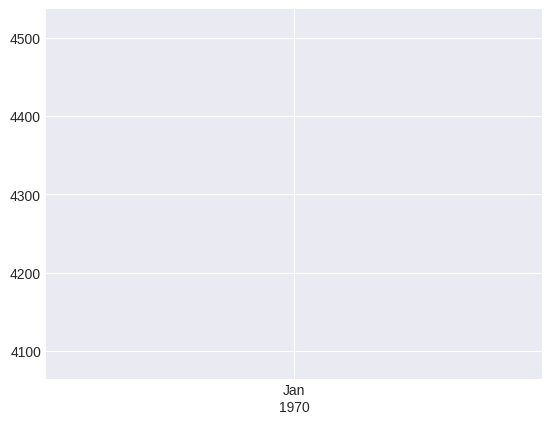

In [ ]:
short_airbnb_df['text'].str.len().resample('3M').mean().plot()

/tmp/ipython-input-216-1820397299.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  short_airbnb_df['text'].resample('6M').count().plot(kind='barh', color='blue')


<Axes: >

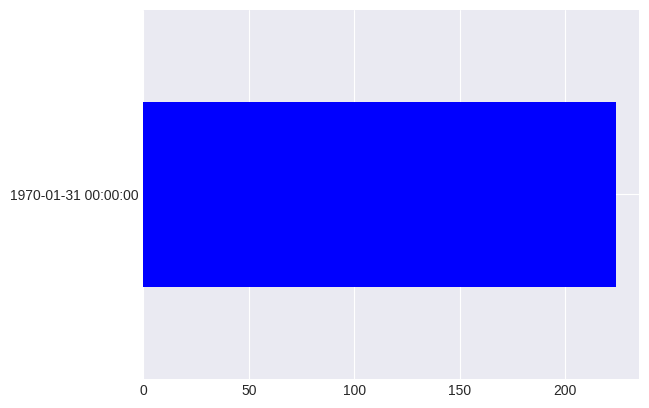

In [ ]:
short_airbnb_df['text'].resample('6M').count().plot(kind='barh', color='blue')

In [ ]:
import matplotlib.pyplot as plt
plt.style.use('default')

In [ ]:
#plt.style.use('classic')
plt.style.use('ggplot')
#plt.style.use('Solarize_Light2')
#plt.style.use('seaborn-v0_8-bright')

/tmp/ipython-input-219-175908563.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  ax = short_airbnb_df['positive'].resample('3M').mean().plot(figsize=(16,4),
/usr/local/lib/python3.11/dist-packages/pandas/plotting/_matplotlib/core.py:1561: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(left, right)
/tmp/ipython-input-219-175908563.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  short_airbnb_df['negative'].resample('3M').mean().plot(figsize=(16,4), ax = ax,
/usr/local/lib/python3.11/dist-packages/pandas/plotting/_matplotlib/core.py:1561: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(left, right)
/tmp/ipython-input-219-175908563.py:5: FutureWarning: 'M' is deprecated and will be removed in a future version, p

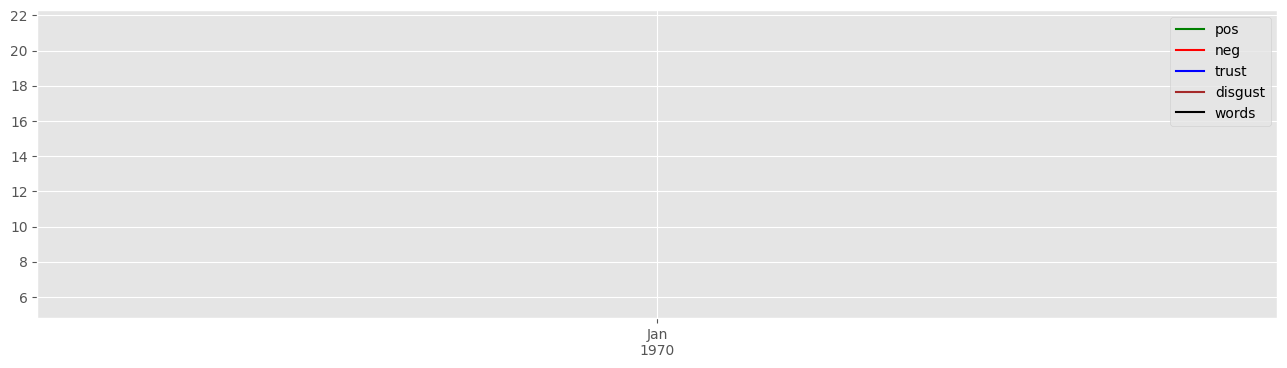

In [ ]:
ax = short_airbnb_df['positive'].resample('3M').mean().plot(figsize=(16,4),
                                                          color = 'g', label='pos')
short_airbnb_df['negative'].resample('3M').mean().plot(figsize=(16,4), ax = ax,
                                                   label = 'neg', color = 'r')
short_airbnb_df['trust'].resample('3M').mean().plot(figsize=(16,4), ax = ax,
                                                label = 'trust',color = 'blue').legend()
short_airbnb_df['disgust'].resample('3M').mean().plot(figsize=(16,4), ax = ax,
                                                label = 'disgust',color = 'brown').legend()
(short_airbnb_df['text'].str.len().resample('3M').mean()/200).plot(figsize=(16,4), ax = ax, # διαιρώ το mean των λέξεων με το 200 για να πλησιάσει στην κλίμακα τα άλλα
                                                label = 'words',color = 'black').legend()

In [ ]:
# daily_df = short_airbnb_df.resample('3M').mean().fillna(0)

/tmp/ipython-input-221-75750340.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  short_airbnb_df['pos/neg'].resample('3M').mean().plot(figsize=(16,4))
/usr/local/lib/python3.11/dist-packages/pandas/plotting/_matplotlib/core.py:1561: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(left, right)


<Axes: >

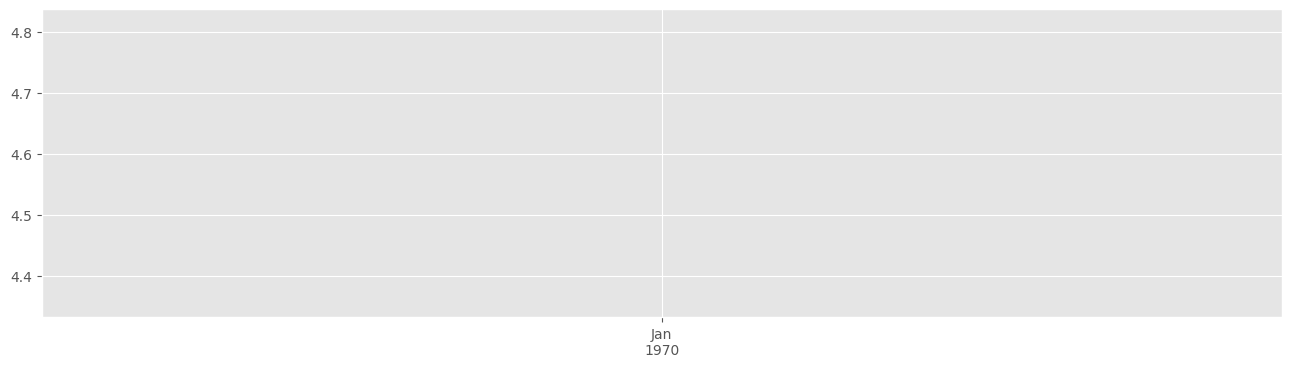

In [ ]:
short_airbnb_df['pos/neg'] = short_airbnb_df['positive'] - short_airbnb_df['negative']
short_airbnb_df['pos/neg'].resample('3M').mean().plot(figsize=(16,4))

In [ ]:
#plt.style.use('grayscale')
plt.style.use('seaborn-v0_8-darkgrid')

/tmp/ipython-input-223-2136036587.py:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  short_airbnb_df['(-)αρνητικότητα | θετικότητα(+)'].resample('3M').mean().plot(kind='bar',
/tmp/ipython-input-223-2136036587.py:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  color=(short_airbnb_df['(-)αρνητικότητα | θετικότητα(+)'].resample('3M').mean()>0


<Axes: >

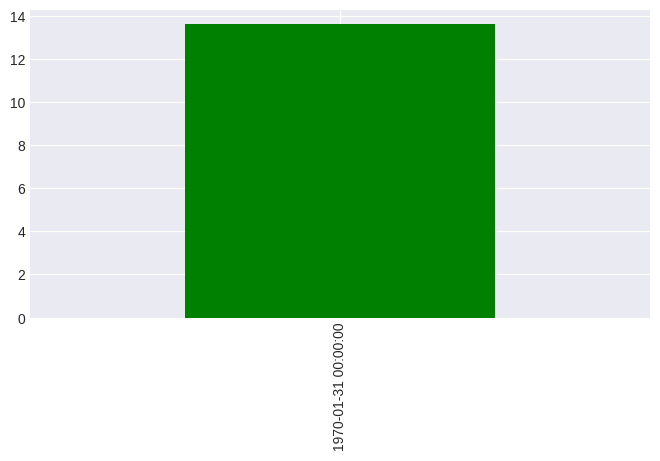

In [ ]:
short_airbnb_df['(-)αρνητικότητα | θετικότητα(+)'] = short_airbnb_df.positive*100//short_airbnb_df[['positive','negative']].sum(
        axis=1) - short_airbnb_df.negative*100//short_airbnb_df[['positive','negative']].sum(axis=1)

short_airbnb_df['(-)αρνητικότητα | θετικότητα(+)'].resample('3M').mean().plot(kind='bar',
                                                                               color=(short_airbnb_df['(-)αρνητικότητα | θετικότητα(+)'].resample('3M').mean()>0
                                                                               ).map({True: 'g', False: 'r'}), figsize=(8,4))

/tmp/ipython-input-224-3375745110.py:6: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  col: short_airbnb_df[col].resample('3M').mean()
/usr/local/lib/python3.11/dist-packages/pandas/plotting/_matplotlib/core.py:1561: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(left, right)
/usr/local/lib/python3.11/dist-packages/pandas/plotting/_matplotlib/core.py:1561: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(left, right)
/usr/local/lib/python3.11/dist-packages/pandas/plotting/_matplotlib/core.py:1561: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(left, right)
/usr/local/lib/python3.11/dist-packages/pandas/plotting/_matplotlib/core.py:1561: UserWarning: Attempting to set identical low and high 

<Axes: >

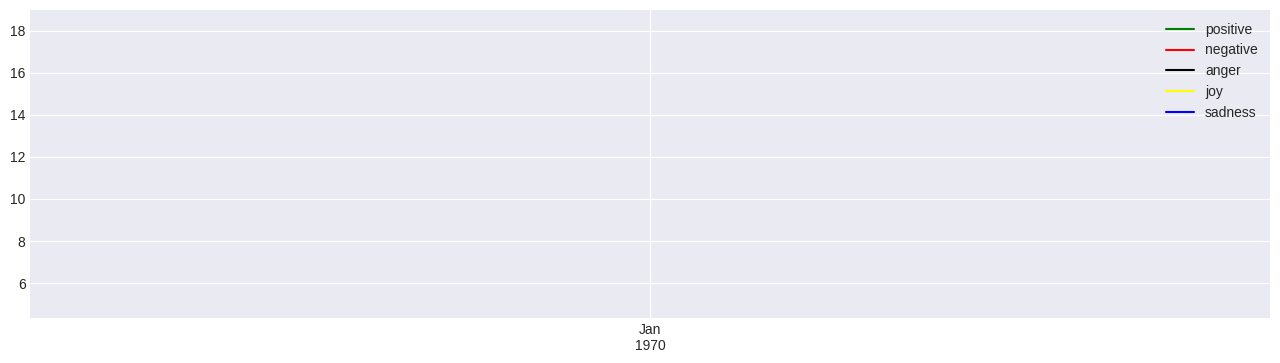

In [ ]:
# List of emotion columns
emotion_cols = ['positive', 'negative', 'anger', 'joy', 'sadness']  # add your columns here

# Resample each and combine
resampled = pd.DataFrame({
    col: short_airbnb_df[col].resample('3M').mean()
    for col in emotion_cols
})
colors = ['green', 'red', 'black', 'yellow', 'blue']
# Plot all lines on one figure
resampled.plot(figsize=(16,4), kind='line', color=colors)


In [ ]:
short_airbnb_df[
    (short_airbnb_df['(-)αρνητικότητα | θετικότητα(+)'] == short_airbnb_df['(-)αρνητικότητα | θετικότητα(+)'].max()) |
    (short_airbnb_df['(-)αρνητικότητα | θετικότητα(+)'] == short_airbnb_df['(-)αρνητικότητα | θετικότητα(+)'].min())
][['positive', 'negative', '(-)αρνητικότητα | θετικότητα(+)']]

,positive,negative,(-)αρνητικότητα | θετικότητα(+)
1970-01-01 00:00:00.000000081,0,3,-100
1970-01-01 00:00:00.000000182,0,1,-100
1970-01-01 00:00:00.000000198,0,6,-100
1970-01-01 00:00:00.000000212,2,0,100


In [ ]:
text = airbnb_df['text_body'].str.cat(sep = ' ')

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
wordcloud1 = WordCloud()
extra_stopwords = {'ή'}
all_stopwords = nlp.Defaults.stop_words.union(extra_stopwords)

wordcloud1 = WordCloud(
    stopwords=all_stopwords,
    width=2000,
    height=1000,
    background_color='black'
).generate(text)
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud1, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [ ]:
mask = short_airbnb_df['text'].str.contains(r'Airbnb|airbnb|AIRBNB', na=False)
print(short_airbnb_df[mask])

In [ ]:
filtered_df = short_airbnb_df[mask]
filtered_df

In [ ]:
len(filtered_df)

In [ ]:
import matplotlib.pyplot as plt

# Δημιουργία μάσκας
mask = short_airbnb_df['text'].str.contains(r'Airbnb|airbnb|AIRBNB', case=False, na=False)

# Υπολογισμός αριθμών
matching = mask.sum()                   # Πόσες γραμμές καλύπτει η μάσκα (True)
not_matching = len(mask) - matching     # Όσες δεν την καλύπτουν

# Δεδομένα για το pie chart
labels = ['περιέχουν "AIRBNB"', 'Δεν περιέχουν']
sizes = [matching, not_matching]
colors = ['blue', 'gray']

# Pie chart
plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Ποσοστό κειμένων που περιέχουν τις λέξεις "AIRBNB"')
plt.axis('equal')  # κάνει τον κύκλο "στρογγυλό"
plt.show()